# Mnist-Datenbank laden & skalieren

In [1]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255


Using TensorFlow backend.


# Bild anzeigen

Originalbild aus der Datenbank:


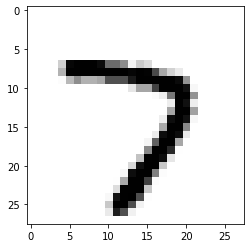

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print("Originalbild aus der Datenbank:")
test_im = test_images[17:18]
plt.imshow(test_im.reshape(28,28), cmap='Greys')

---
---
# Modell laden

In [3]:
from keras.models import load_model

# load model
cnn_model = load_model('mnist_trained_cnn_model.h5')

---
---
# disable scrollable frames

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Heatmaps visualisieren

conv2d_1/Relu:0 (1, 26, 26, 32) 


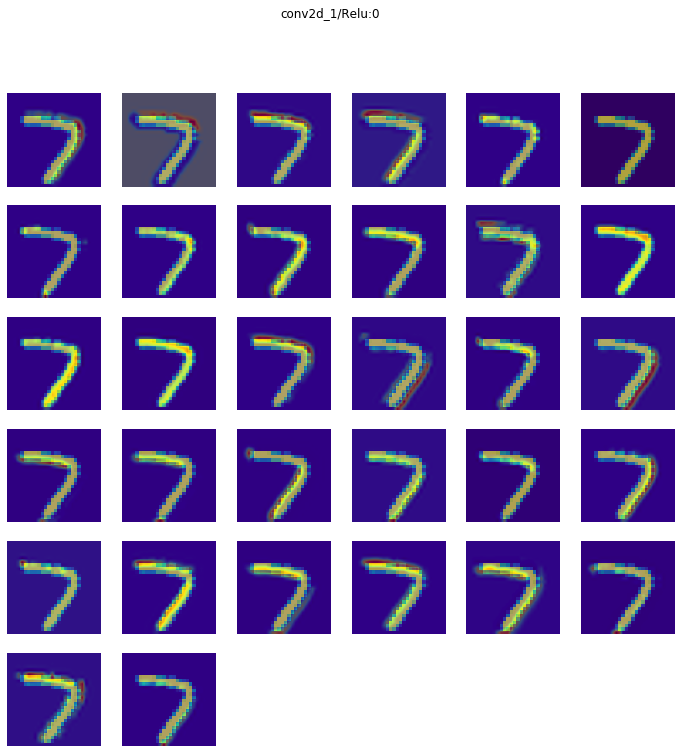

max_pooling2d_1/MaxPool:0 (1, 13, 13, 32) 


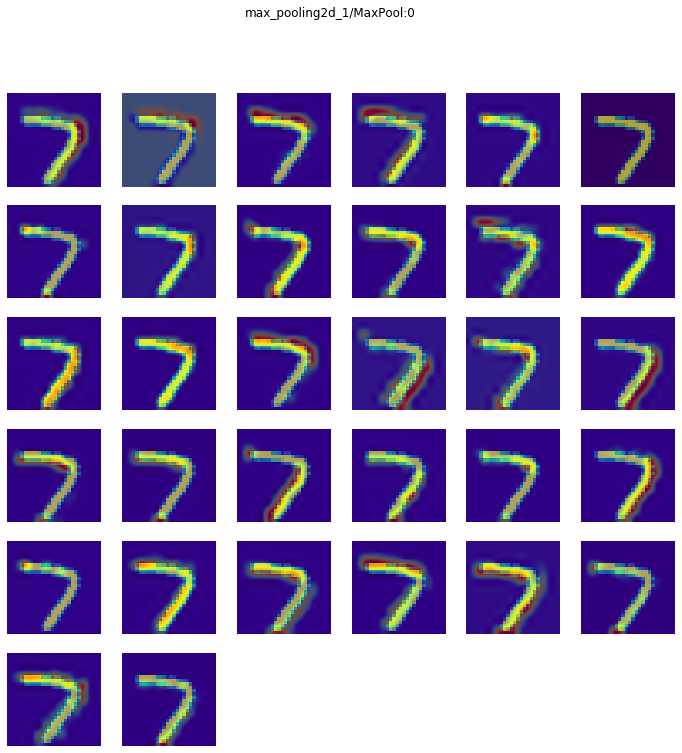

conv2d_2/Relu:0 (1, 11, 11, 64) 


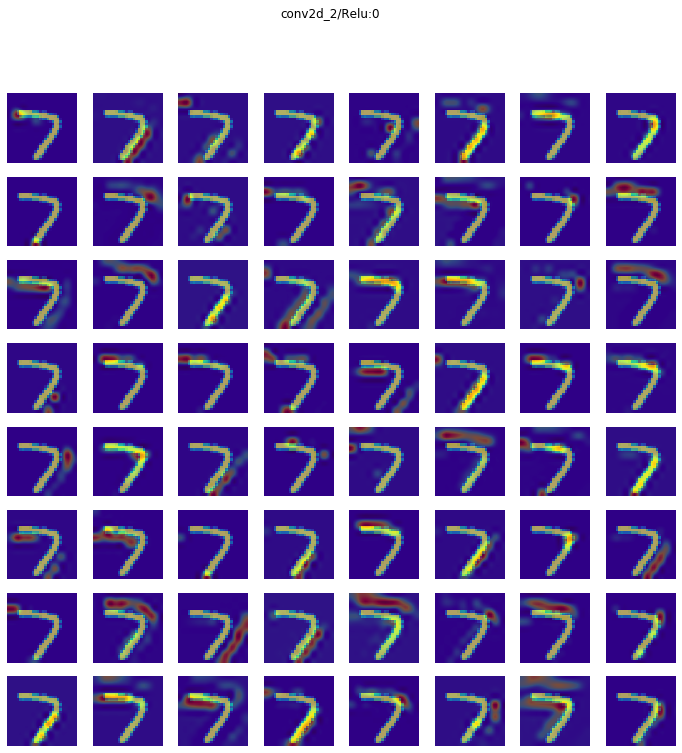

max_pooling2d_2/MaxPool:0 (1, 5, 5, 64) 


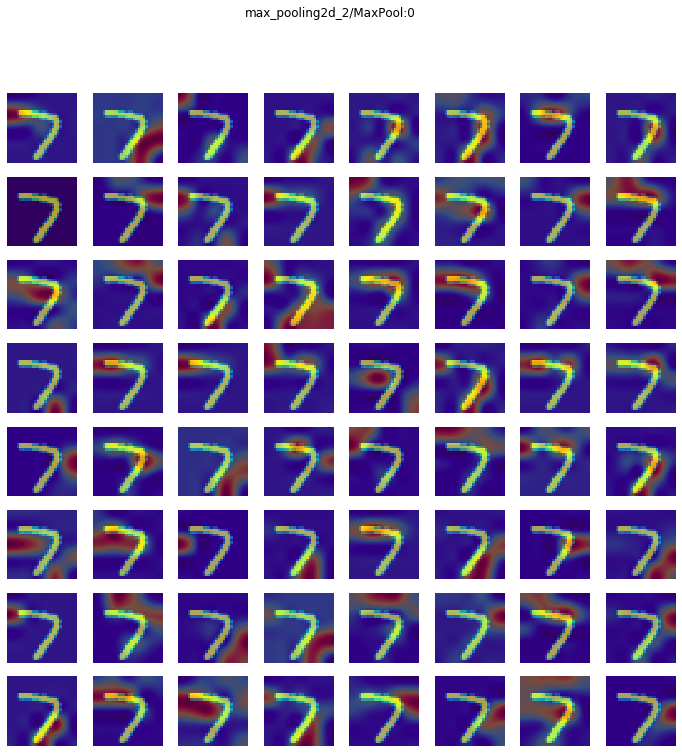

conv2d_3/Relu:0 (1, 3, 3, 64) 


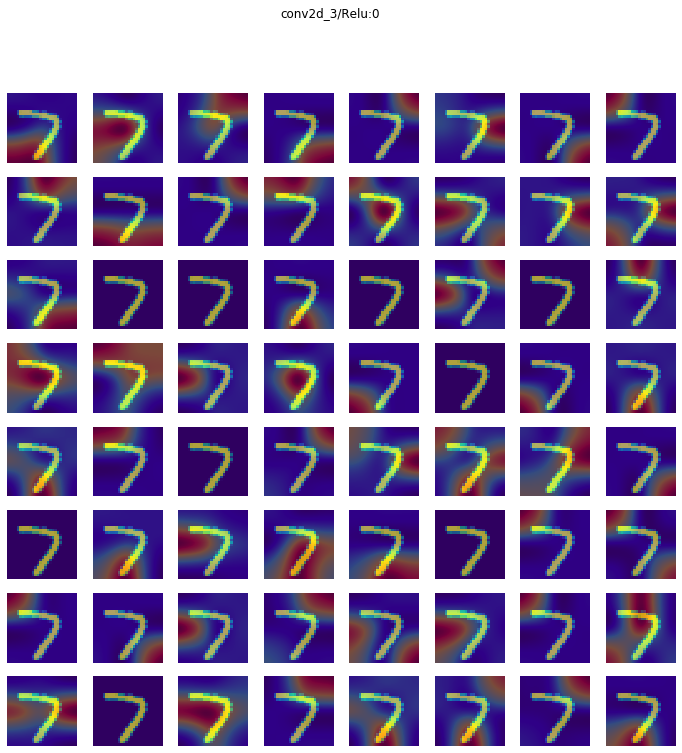

flatten_1/Reshape:0 (1, 576) -> Skipped. 2D Activations.
dense_1/Relu:0 (1, 64) -> Skipped. 2D Activations.
dense_2/Softmax:0 (1, 10) -> Skipped. 2D Activations.


In [5]:
from keract import get_activations, display_activations
from keract import display_heatmaps

keract_inputs = test_images[17:18]
keract_targets = test_labels[17:18]
activations = get_activations(cnn_model, keract_inputs)
#display_activations(activations, cmap="gray", save=False)

display_heatmaps(activations, keract_inputs, save=False)
